##Importing Library

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

##Understanding Data

Check the shape of the data and ensure that it has the correct data type.

In [ ]:
df = pd.read_csv("/content/Data Train.csv")
print("Shape of data {}".format(df.shape))
print("Row of data {}".format(df.shape[0]))
print("Column of data {}".format(df.shape[1]))
df.info()

Shape of data (4250, 20)
Row of data 4250
Column of data 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   f

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Check for null or NaN values.

In [ ]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
categorical = []
numerical =[]
for i in df.columns :
  if ((df[i].dtype == "int64") or (df[i].dtype == "float64")):
    numerical.append(i)
  else:
    categorical.append(i)

print("data with numerical data type :{}".format(numerical))
print("data with categorical data type : {}".format(categorical))

data with numerical data type :['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
data with categorical data type : ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


from data above we know that the columns with the categorical or numerical data type





In [ ]:
df.account_length.nunique()

215

Text(0.5, 1.0, 'Relationship between Account Length and Churn')

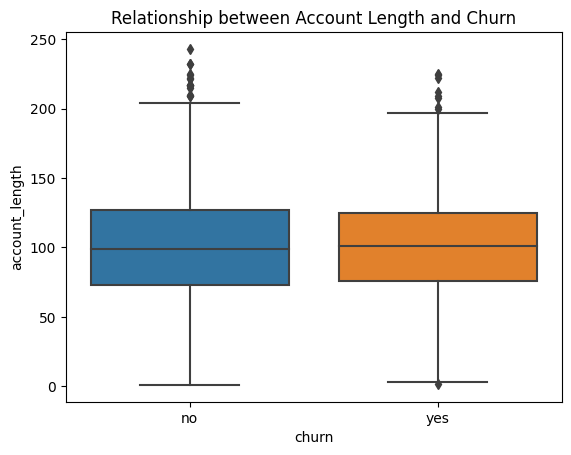

In [ ]:
  sns.boxplot(x="churn", y="account_length", data=df[["churn","account_length"]])

  # Add a title
  plt.title("Relationship between Account Length and Churn")

dropping the 'account_length' feature as it contains many unique values and is unlikely to contribute to the churn prediction, as it does not provide any meaningful information

In [ ]:
df.drop(columns=['account_length'] , axis=1 , inplace=True)

 create a visualization based on the data to show the ratio of churned customers to non-churned customers.

In [ ]:
table = np.round(df.churn.value_counts()/len(df.churn),2)

churn_ratio = pd.DataFrame(table).T
churn_ratio = churn_ratio.rename(columns={"no" : "Not-churn","yes" : "Churn"})
churn_ratio

,Not-churn,Churn
churn,0.86,0.14


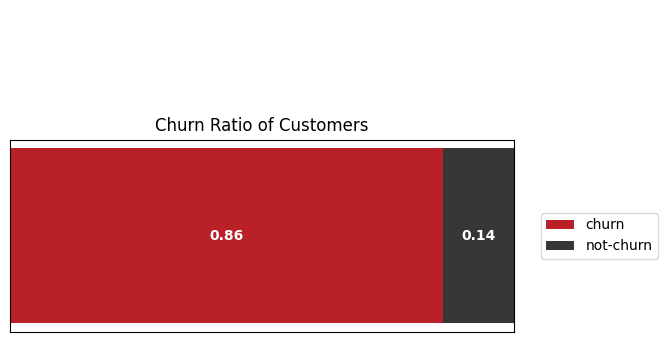

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(churn_ratio.index, churn_ratio['Not-churn'],color='#b20710', alpha=0.9, label='churn')
ax.barh(churn_ratio.index, churn_ratio['Churn'], left=churn_ratio['Not-churn'],color='#221f1f', alpha=0.9, label='not-churn')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Annotate the churn ratio on the plot
for i, v in enumerate(churn_ratio.values[0]):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')
    ax.text(v/2 + 0.5, i, str(1 - v), color='white', fontweight='bold', ha='center', va='center')

# Add legends and title to the plot
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
ax.set_title('Churn Ratio of Customers')

plt.show()

check duplicated value 

In [ ]:
print('duplicate values in df is' ,df.duplicated().sum())

duplicate values in df is 0


see number of unique value in categorical feature 

In [ ]:
df[categorical].nunique().sort_values(ascending=False)

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64

We are dropping the 'state' feature as it will not contribute to our model's prediction. We will not be using the model to make predictions for that particular state, and the state and area code are a pair of features that may not be useful when considered together.

In [ ]:
df.drop(columns=["state","area_code"],axis=1,inplace=True)

In [ ]:
categorical.remove("state")
categorical.remove("area_code")
categorical

['international_plan', 'voice_mail_plan', 'churn']

##Exploring Data Analysis

use a count plot to visualize our categorical features and understand the proportion of each value within each feature. This can help to identify which values are most common and how they are distributed within each categorical feature.

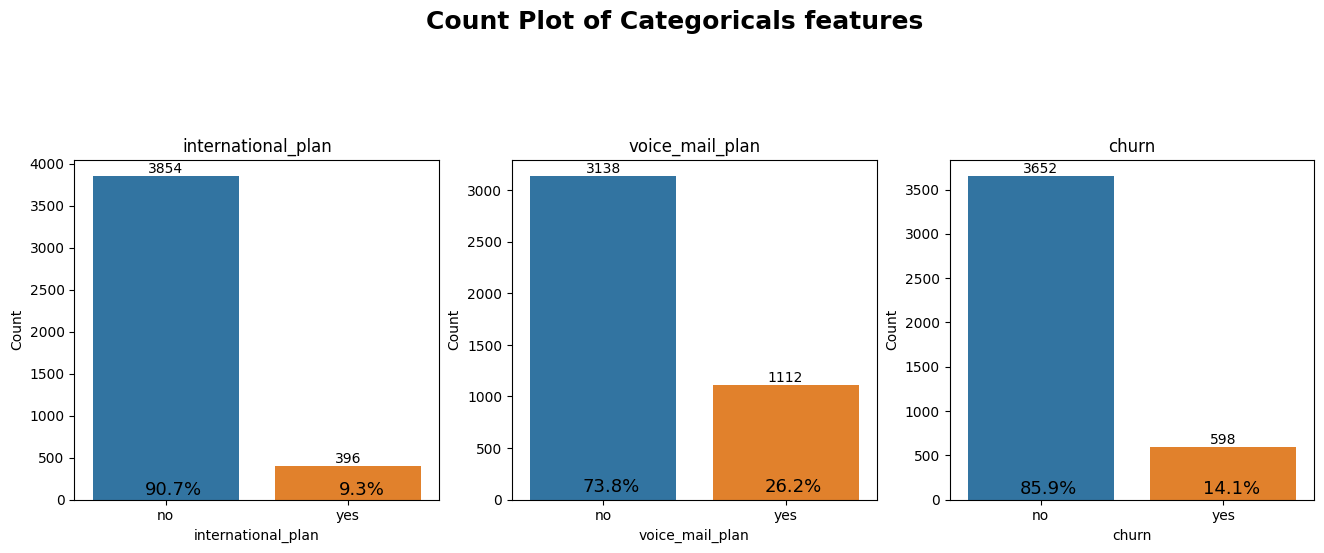

In [ ]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
for i , columns in enumerate(categorical):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

In [ ]:
numerical.remove("account_length")

While exploring the numerical features, we created a figure with a 3 x 3 grid of subplots using the seaborn library to plot the distribution of each feature. We also added vertical lines to show the 25%, 50% (median), and 75% quartiles, as well as the mean value of each feature. Additionally, we displayed the skewness of each feature in the subplot title. This visualization will help us to identify any patterns or outliers in the numerical features that could be relevant for predicting churn.

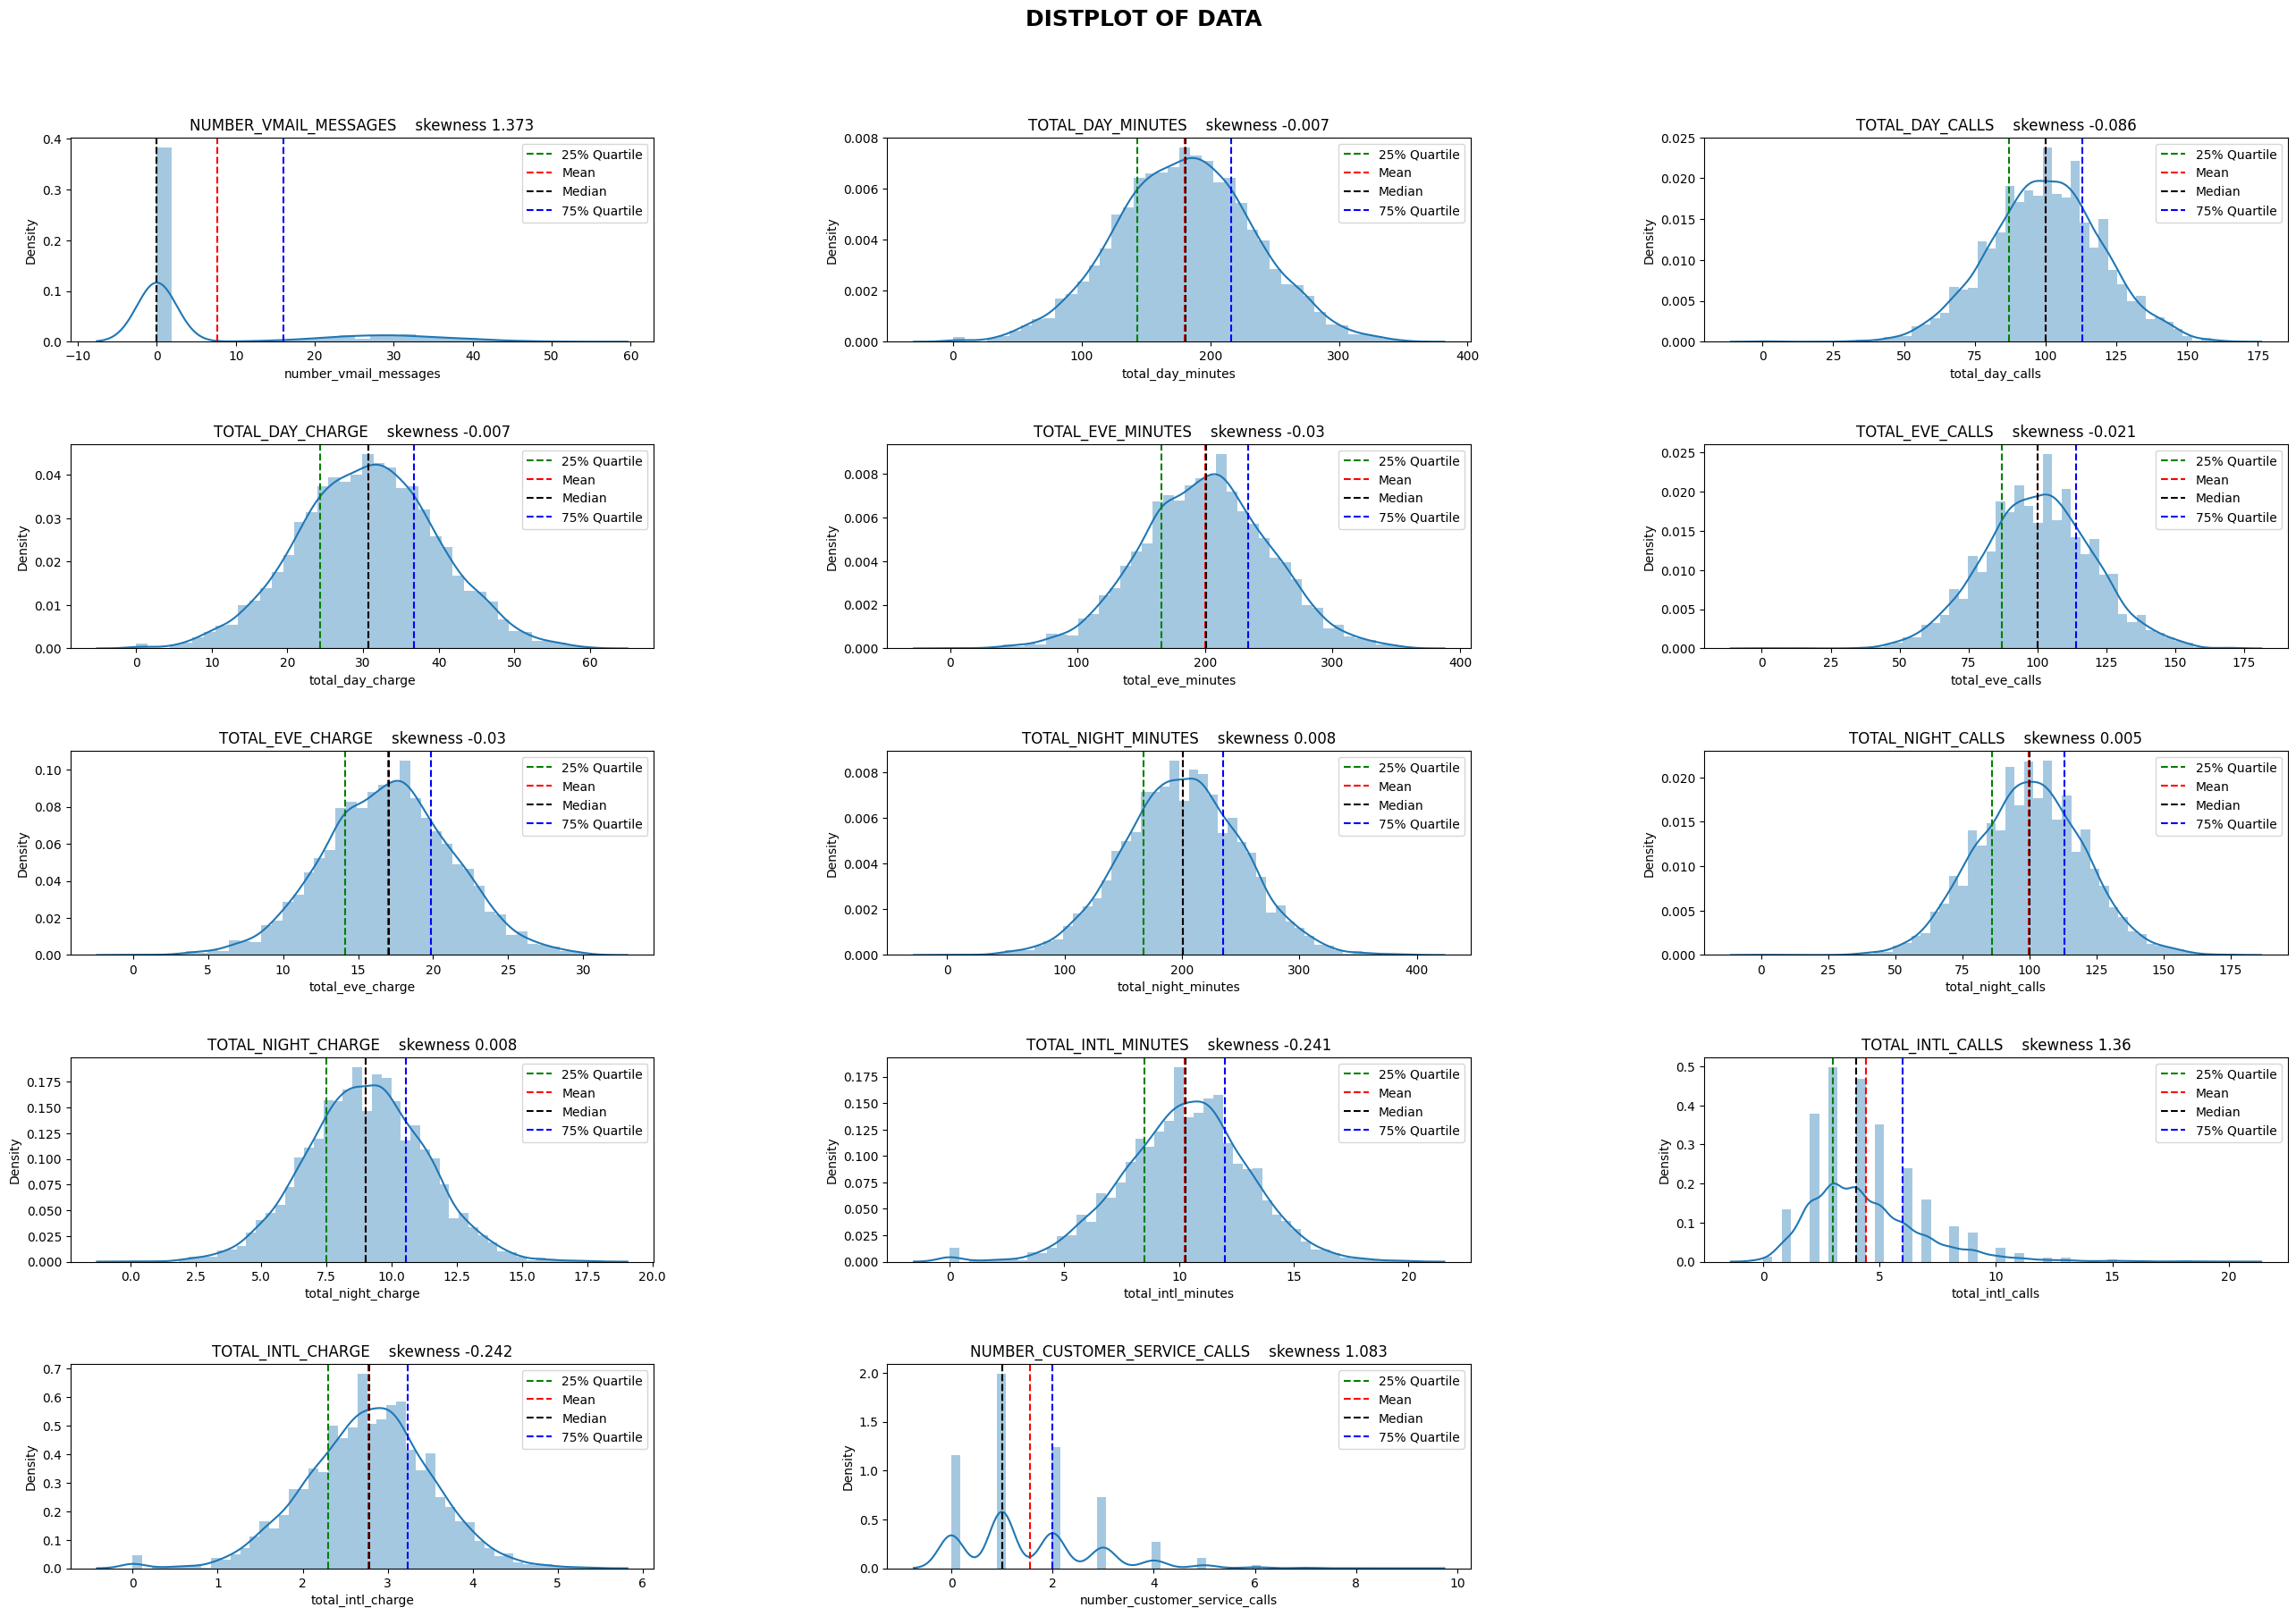

In [ ]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col]) 
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    ax.legend(fontsize=10) 

We are visualizing a bivariate analysis of the categorical features with respect to the target variable 'churn' to understand the proportion of the values of each categorical feature and how they contribute to customer churn. The count plot visualization helps to get an idea of the number of customers who churned and who did not churn for each category of a feature, and how it varies across different categories. This can help in identifying any patterns or trends in the data that can be useful in predicting customer churn

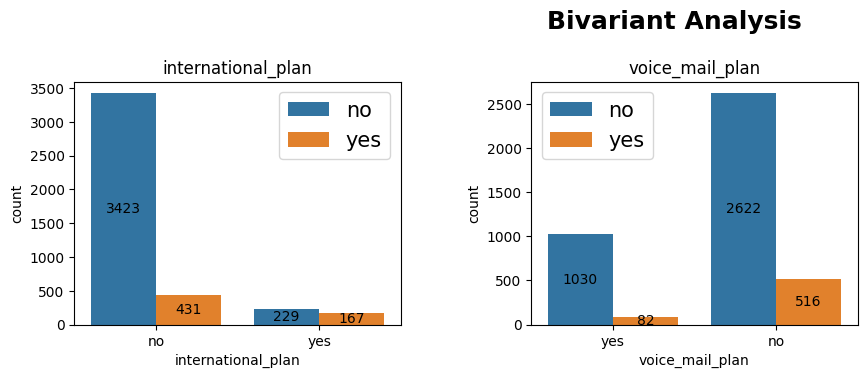

In [ ]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categorical[:2]):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['churn'] )
    a.set_title(col)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

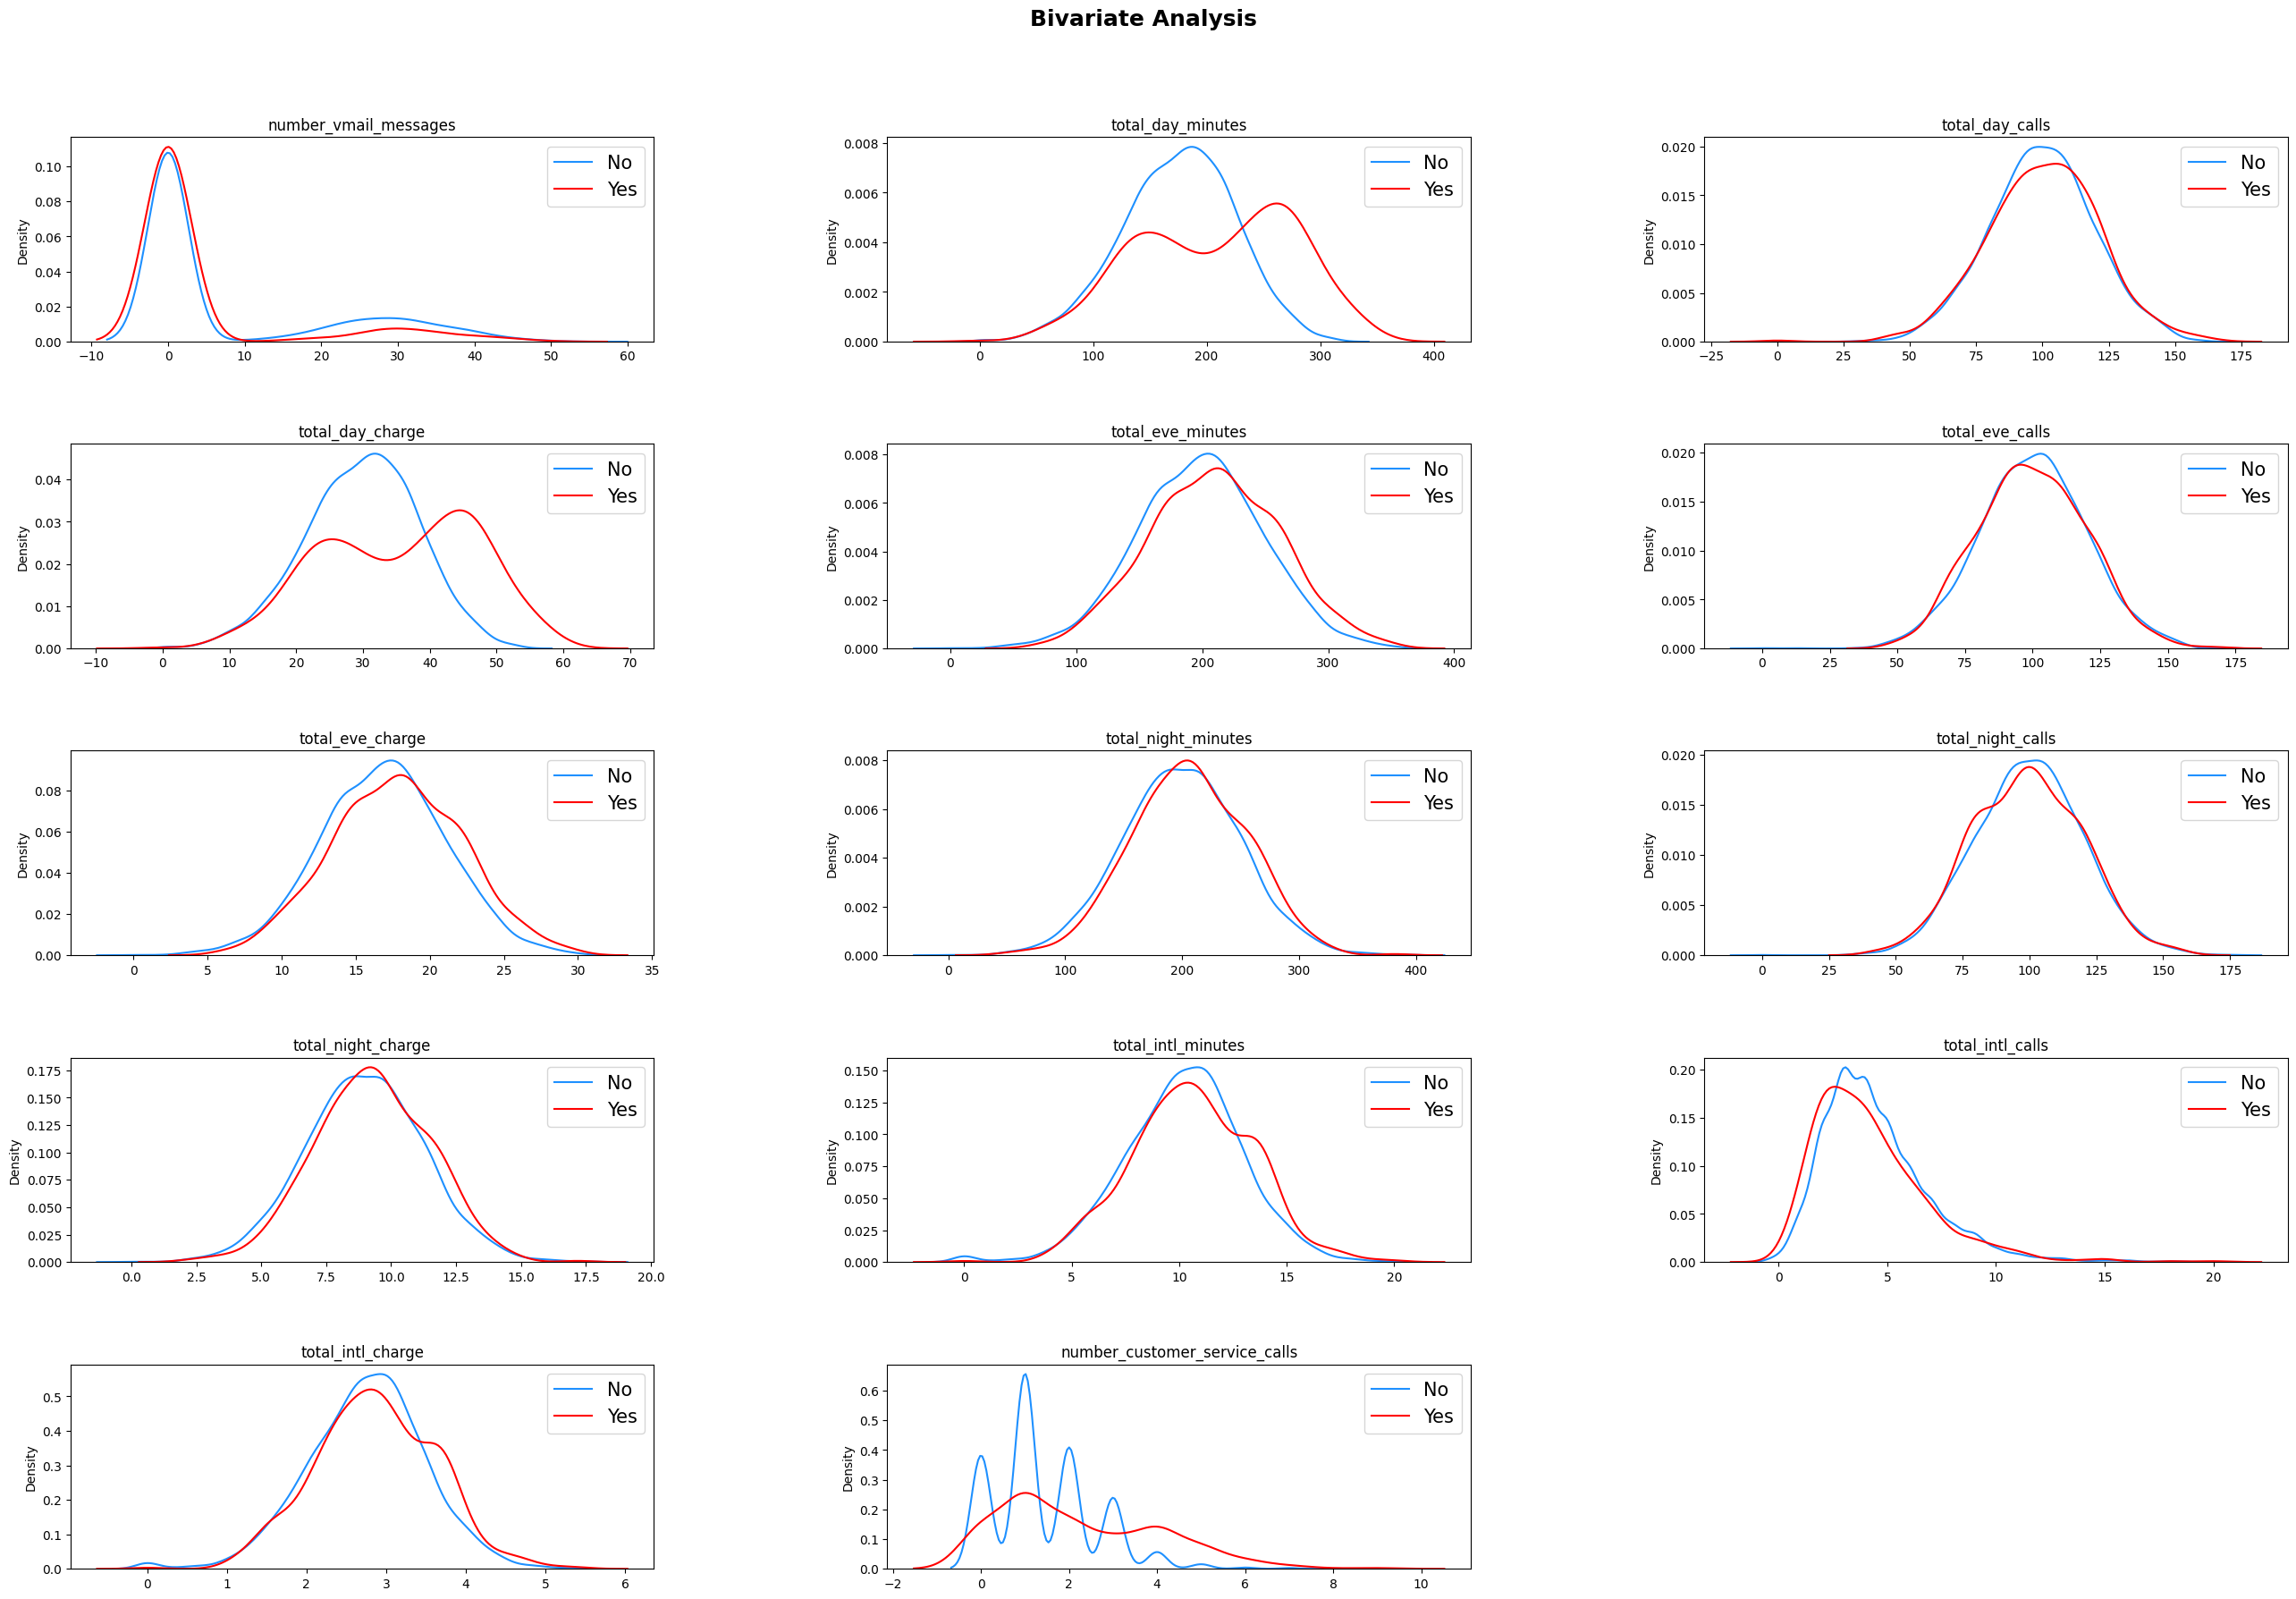

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical):
    a = fig.add_subplot(6, 3, i+1)
    sns.distplot(x =df[df['churn']=='no'][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['churn']=='yes'][col],  color='red' , ax=a , hist =False) 
    a.set_title(col)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

This visualization helps us to understand the distribution of churn for each category of the categorical features. If the ratio of churned to non-churned customers appears similar across categories, it suggests a normal distribution and that the feature may not have a significant impact on churn. If the ratio appears to be skewed towards one category, it suggests that the feature may have a stronger impact on churn.

##OUTLIER HANDLE

In [ ]:
df_num = df[numerical]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

number_vmail_messages            True
total_day_minutes                True
total_day_calls                  True
total_day_charge                 True
total_eve_minutes                True
total_eve_calls                  True
total_eve_charge                 True
total_night_minutes              True
total_night_calls                True
total_night_charge               True
total_intl_minutes               True
total_intl_calls                 True
total_intl_charge                True
number_customer_service_calls    True
dtype: bool

Based on the code above, all numerical features had outliers.

###visualization the outlier on feature

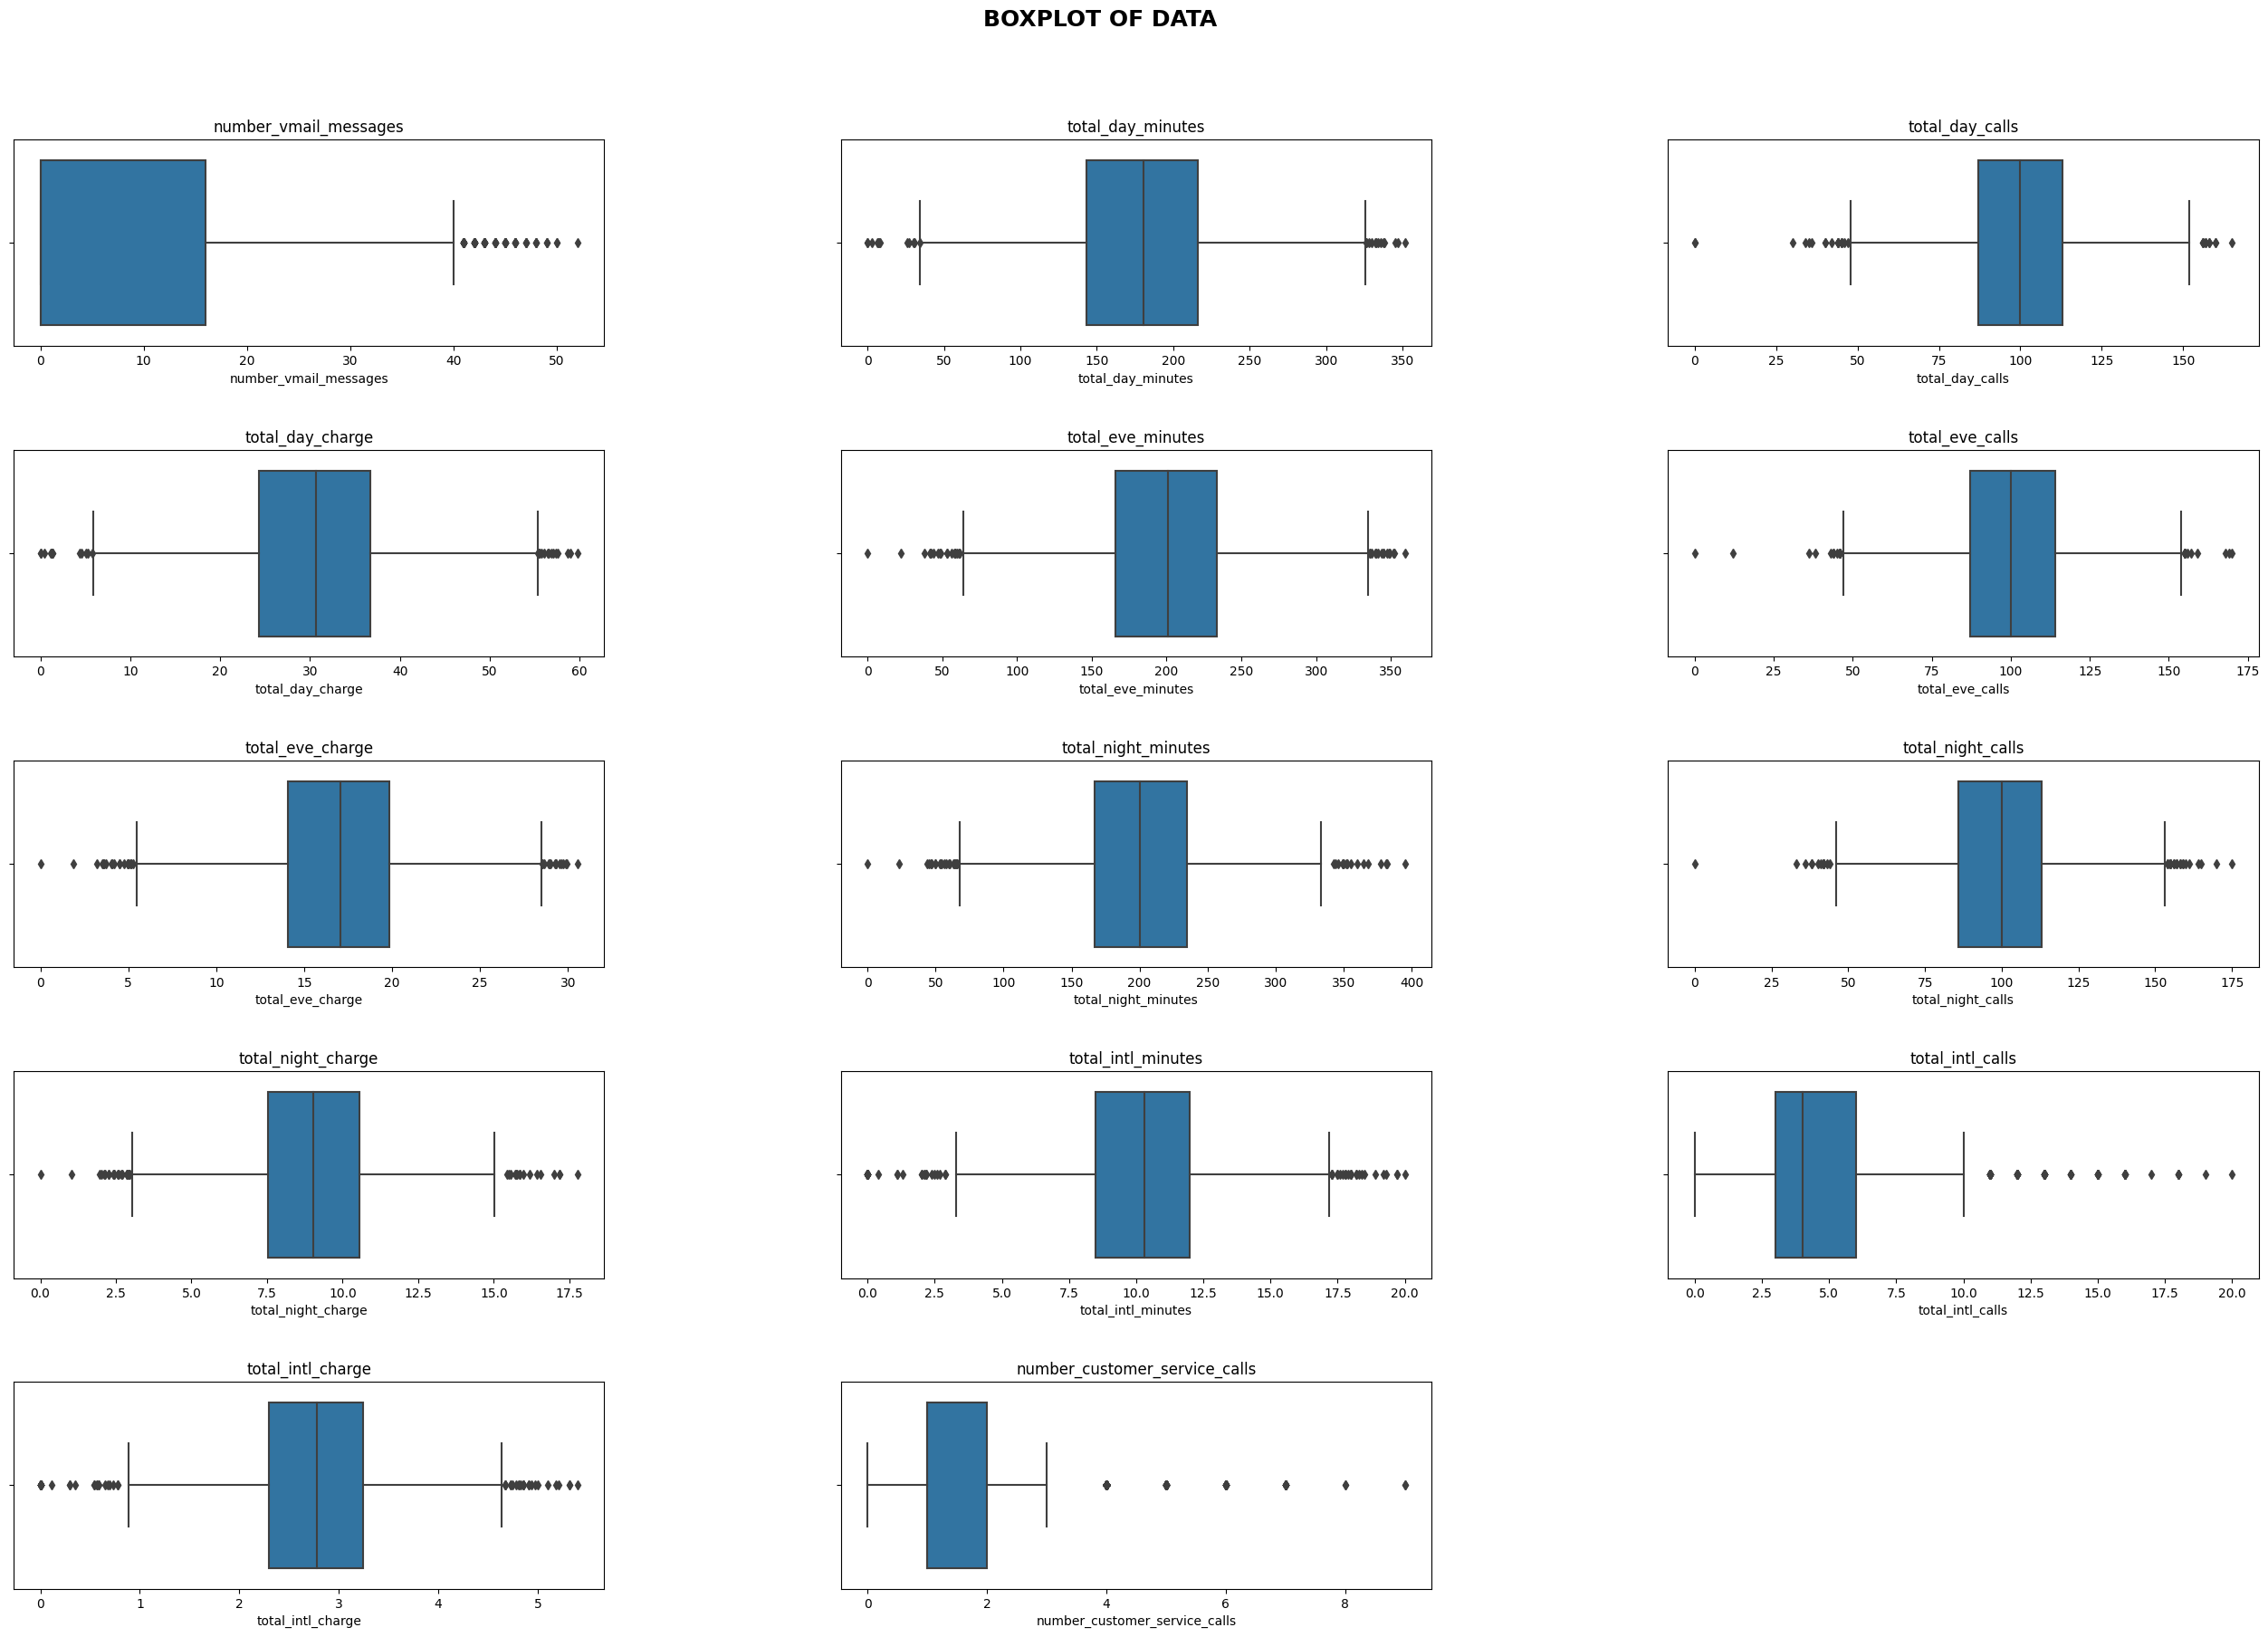

In [ ]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

This code calculates the Interquartile Range (IQR) for each numerical column in the dataset. The IQR is a measure of the spread of the data that gives an idea of how spread out the middle 50% of the data is. Using the IQR, the code then identifies any values that are considered to be outliers in the dataset.The upper and lower limits are calculated using a standard formula, and they are stored in a dictionary for future use.

In [ ]:
# Finding the IQR For Budget columns
dict = {}
for col in numerical:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [ ]:
for col in numerical:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} Customers data which {} are more than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

There are total 0 Customers data which number_vmail_messages are less than lower limit.
There are total 86 Customers data which number_vmail_messages are more than upper limit.
There are total 12 Customers data which total_day_minutes are less than lower limit.
There are total 13 Customers data which total_day_minutes are more than upper limit.
There are total 18 Customers data which total_day_calls are less than lower limit.
There are total 10 Customers data which total_day_calls are more than upper limit.
There are total 12 Customers data which total_day_charge are less than lower limit.
There are total 14 Customers data which total_day_charge are more than upper limit.
There are total 19 Customers data which total_eve_minutes are less than lower limit.
There are total 15 Customers data which total_eve_minutes are more than upper limit.
There are total 13 Customers data which total_eve_calls are less than lower limit.
There are total 11 Customers data which total_eve_calls are more t

This code is used to remove outliers from the numerical features in the dataset. 

The code first checks if a value in a column is greater than the upper limit defined earlier for that column. If it is, the value is replaced with the upper limit. Similarly, if the value is smaller than the lower limit, it is replaced with the lower limit. If the value falls within the range of the limits, it is kept as it is.

This process is applied to all the numerical columns in the dataset to ensure that the data is more accurate and reliable for further analysis.

In [ ]:
for col in numerical:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]  
        )
    )

created visualization after the outlier is handled 

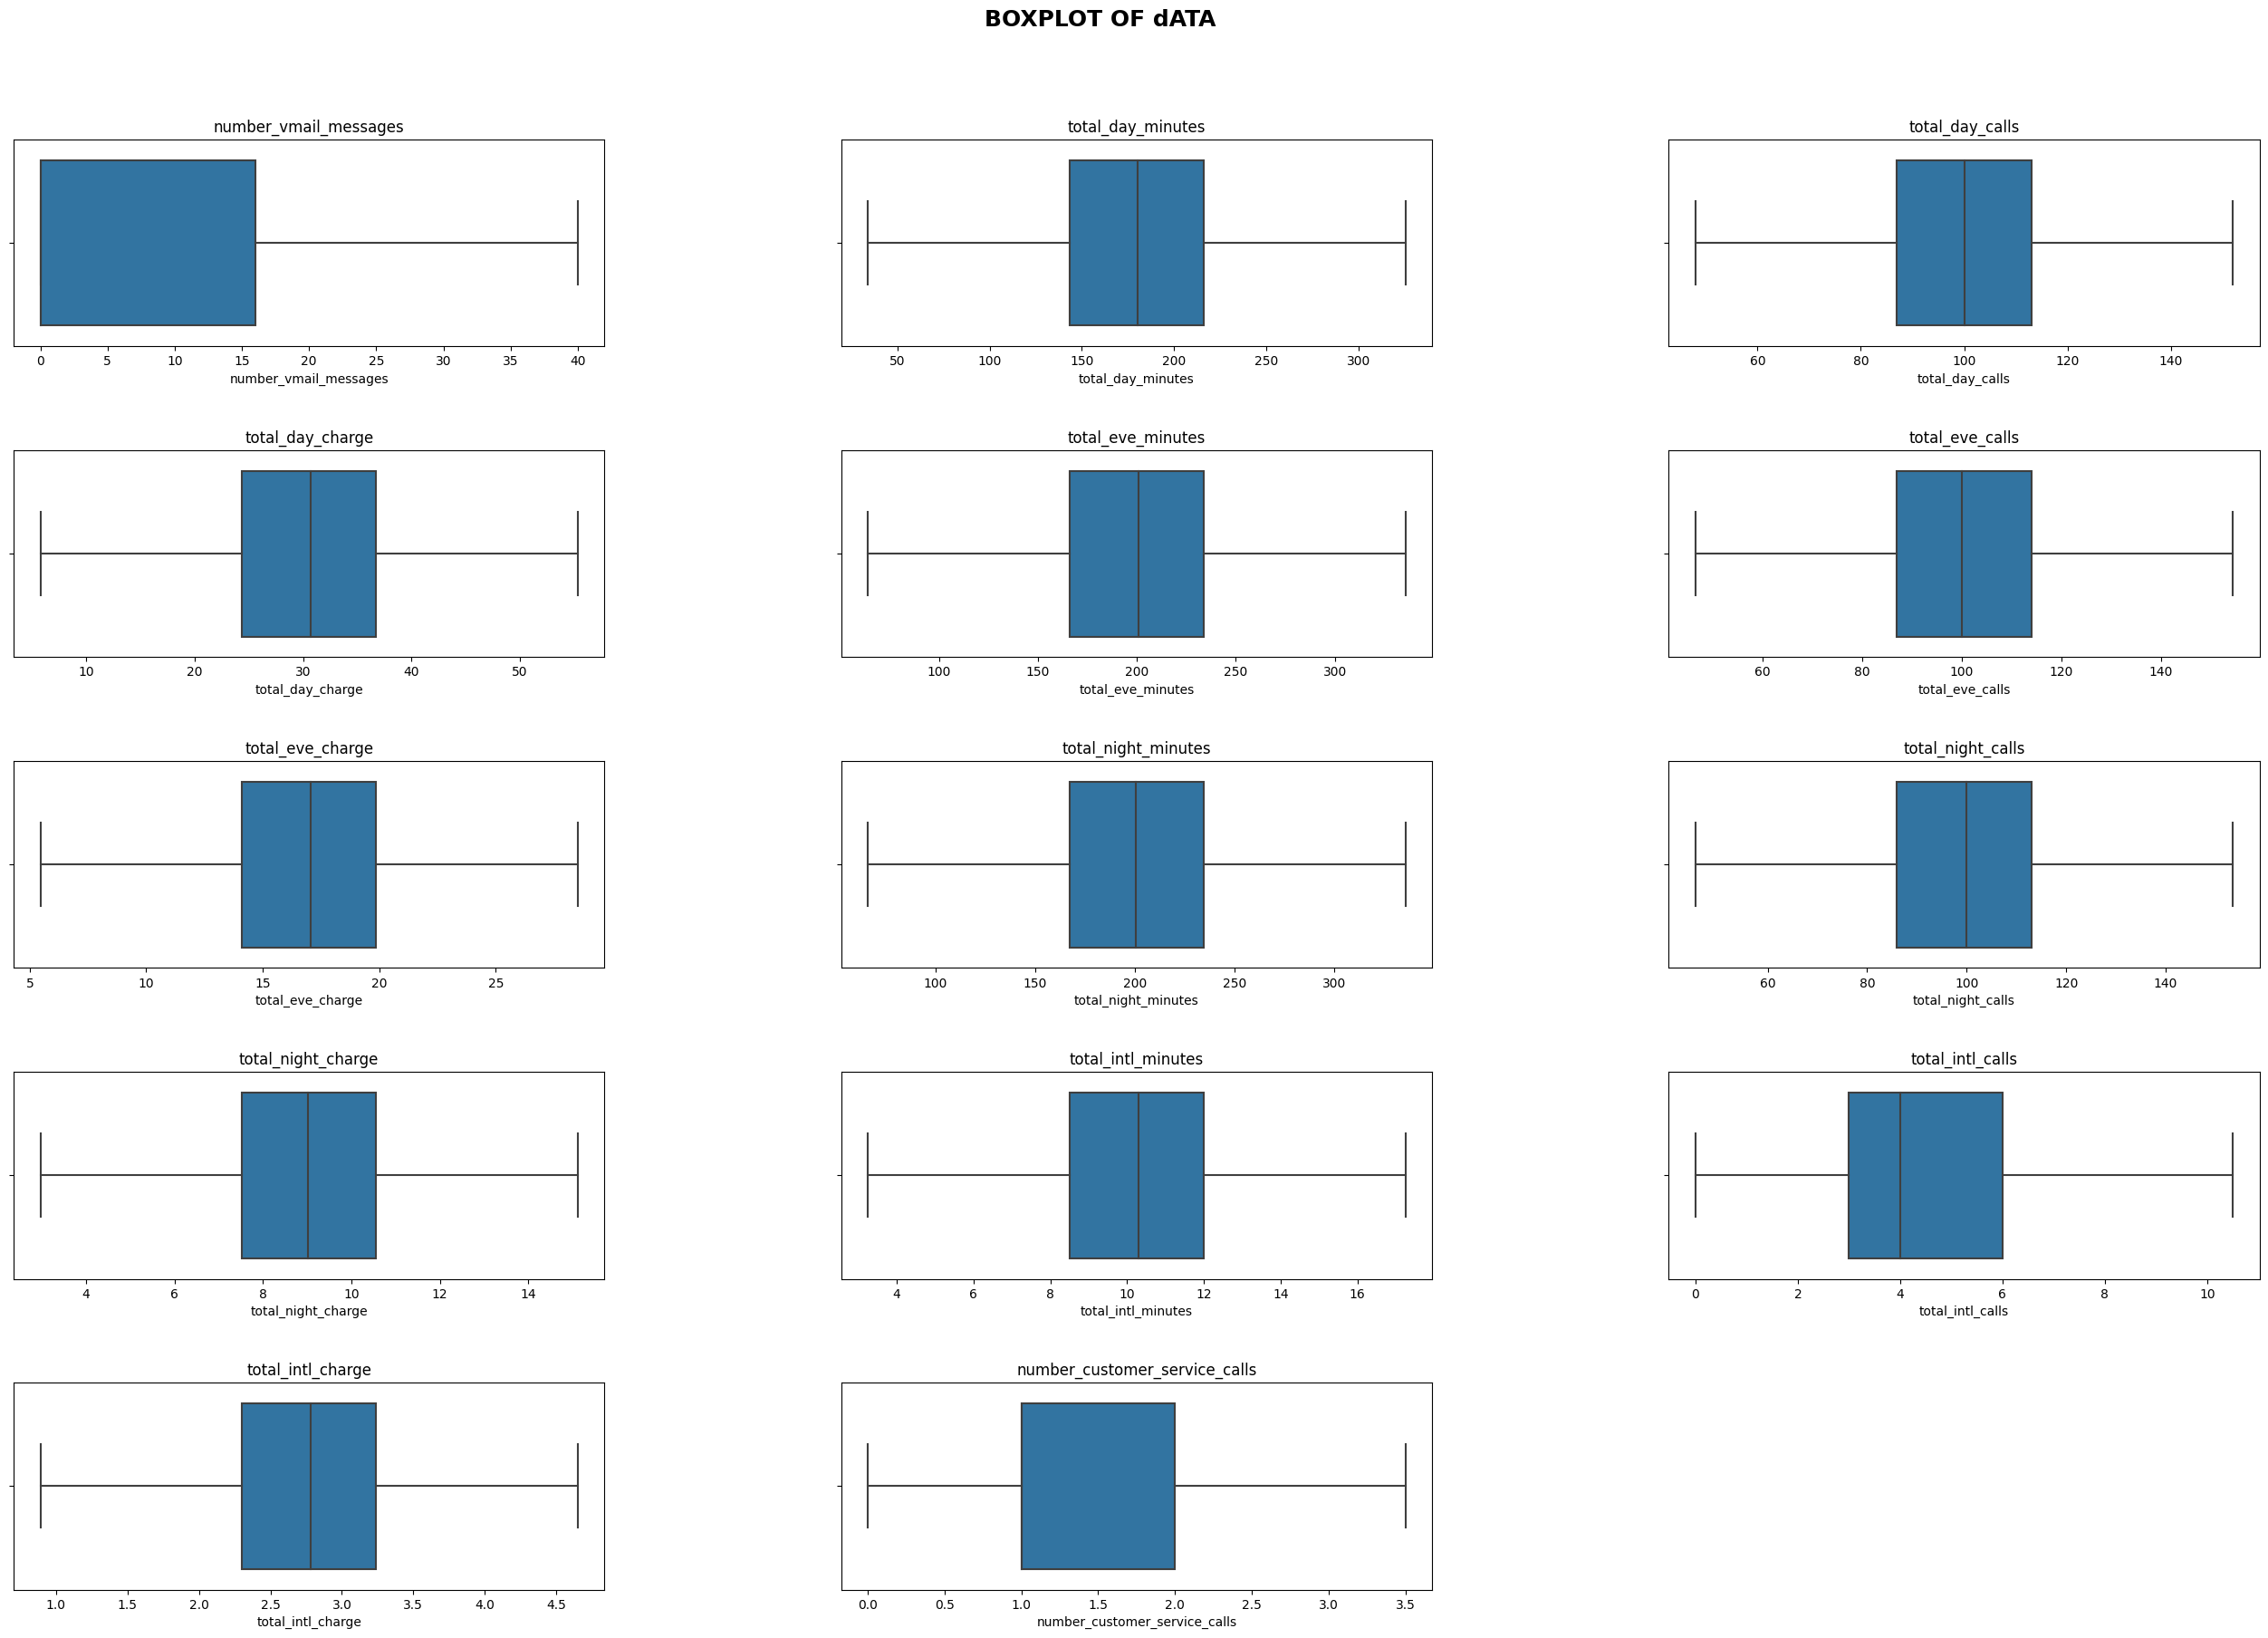

In [ ]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

In [ ]:
df.columns

Index(['international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
df.number_vmail_messages

0       26.0
1        0.0
2        0.0
3        0.0
4       24.0
        ... 
4245     0.0
4246     0.0
4247     0.0
4248    40.0
4249    34.0
Name: number_vmail_messages, Length: 4250, dtype: float64

##Corelation Analysis

<Axes: >

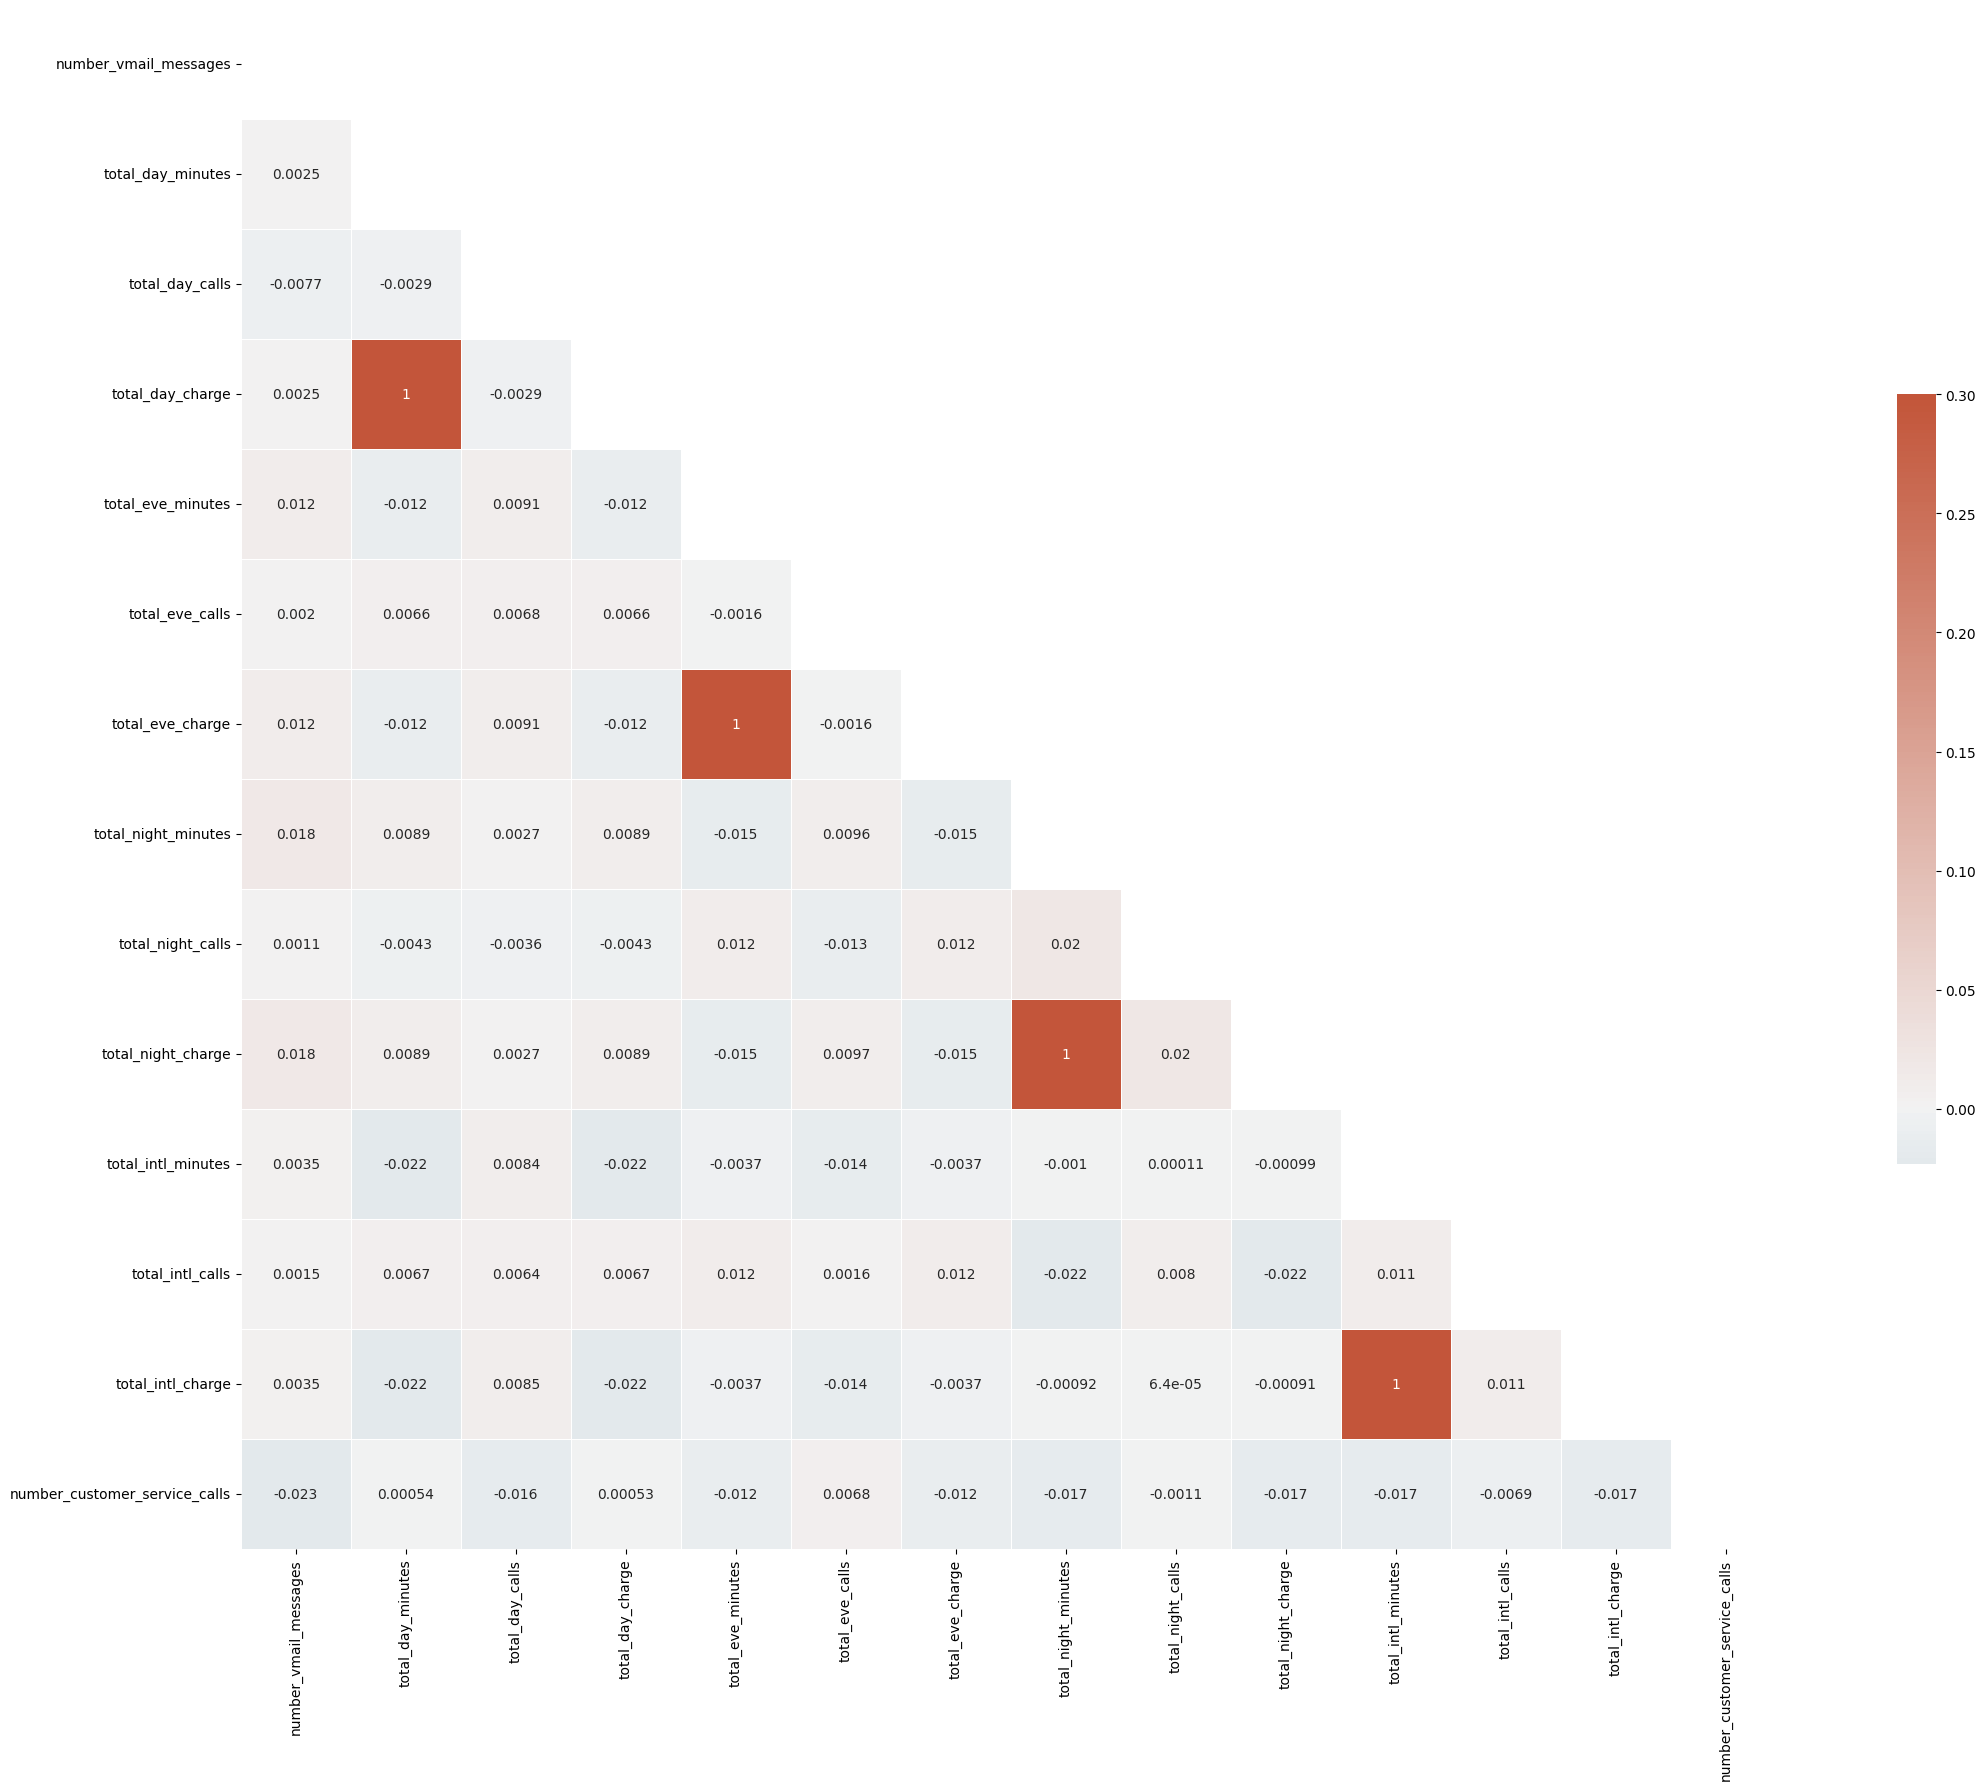

In [ ]:
corr = df.corr()
#generate mask for upper triangle 
mask = np.triu(np.ones_like(corr,dtype=bool))

#set up matplotlib figure 
f,ax = plt.subplots(figsize=(30,20))
#generate a custome divergin columns
cmap = sns.diverging_palette(230,20,as_cmap=True)
#draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True, linewidths=.5,cbar_kws={"shrink": .5}, annot= True)

In [ ]:
plt.clf()

<Figure size 640x480 with 0 Axes>

##Feature Engineer
technique that create new variables to simplfy the model and increase its accuracy by using new variable 

In [ ]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


Since the categorical feature has only two possible values, binary encoding is sufficient for its transformation.

In [ ]:
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 
df['churn'] = df['churn'].map({'yes': 1, 'no': 0}) 

In [ ]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,0,1,26.0,161.6,123.0,27.47,195.50,103.0,16.620,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0,611.50,329.0,55.540
1,0,0,0.0,243.4,114.0,41.38,121.20,110.0,10.300,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0,527.20,328.0,59.000
2,1,0,0.0,299.4,71.0,50.90,64.15,88.0,5.455,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0,560.45,248.0,65.215
3,1,0,0.0,166.7,113.0,28.34,148.30,122.0,12.610,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0,501.90,356.0,49.360
4,0,1,24.0,218.2,88.0,37.09,335.55,108.0,28.515,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0,766.35,314.0,75.175


Because we have already simplified some features, we need to drop the original features, as keeping them will result in high correlation.

In [ ]:
df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

<Axes: >

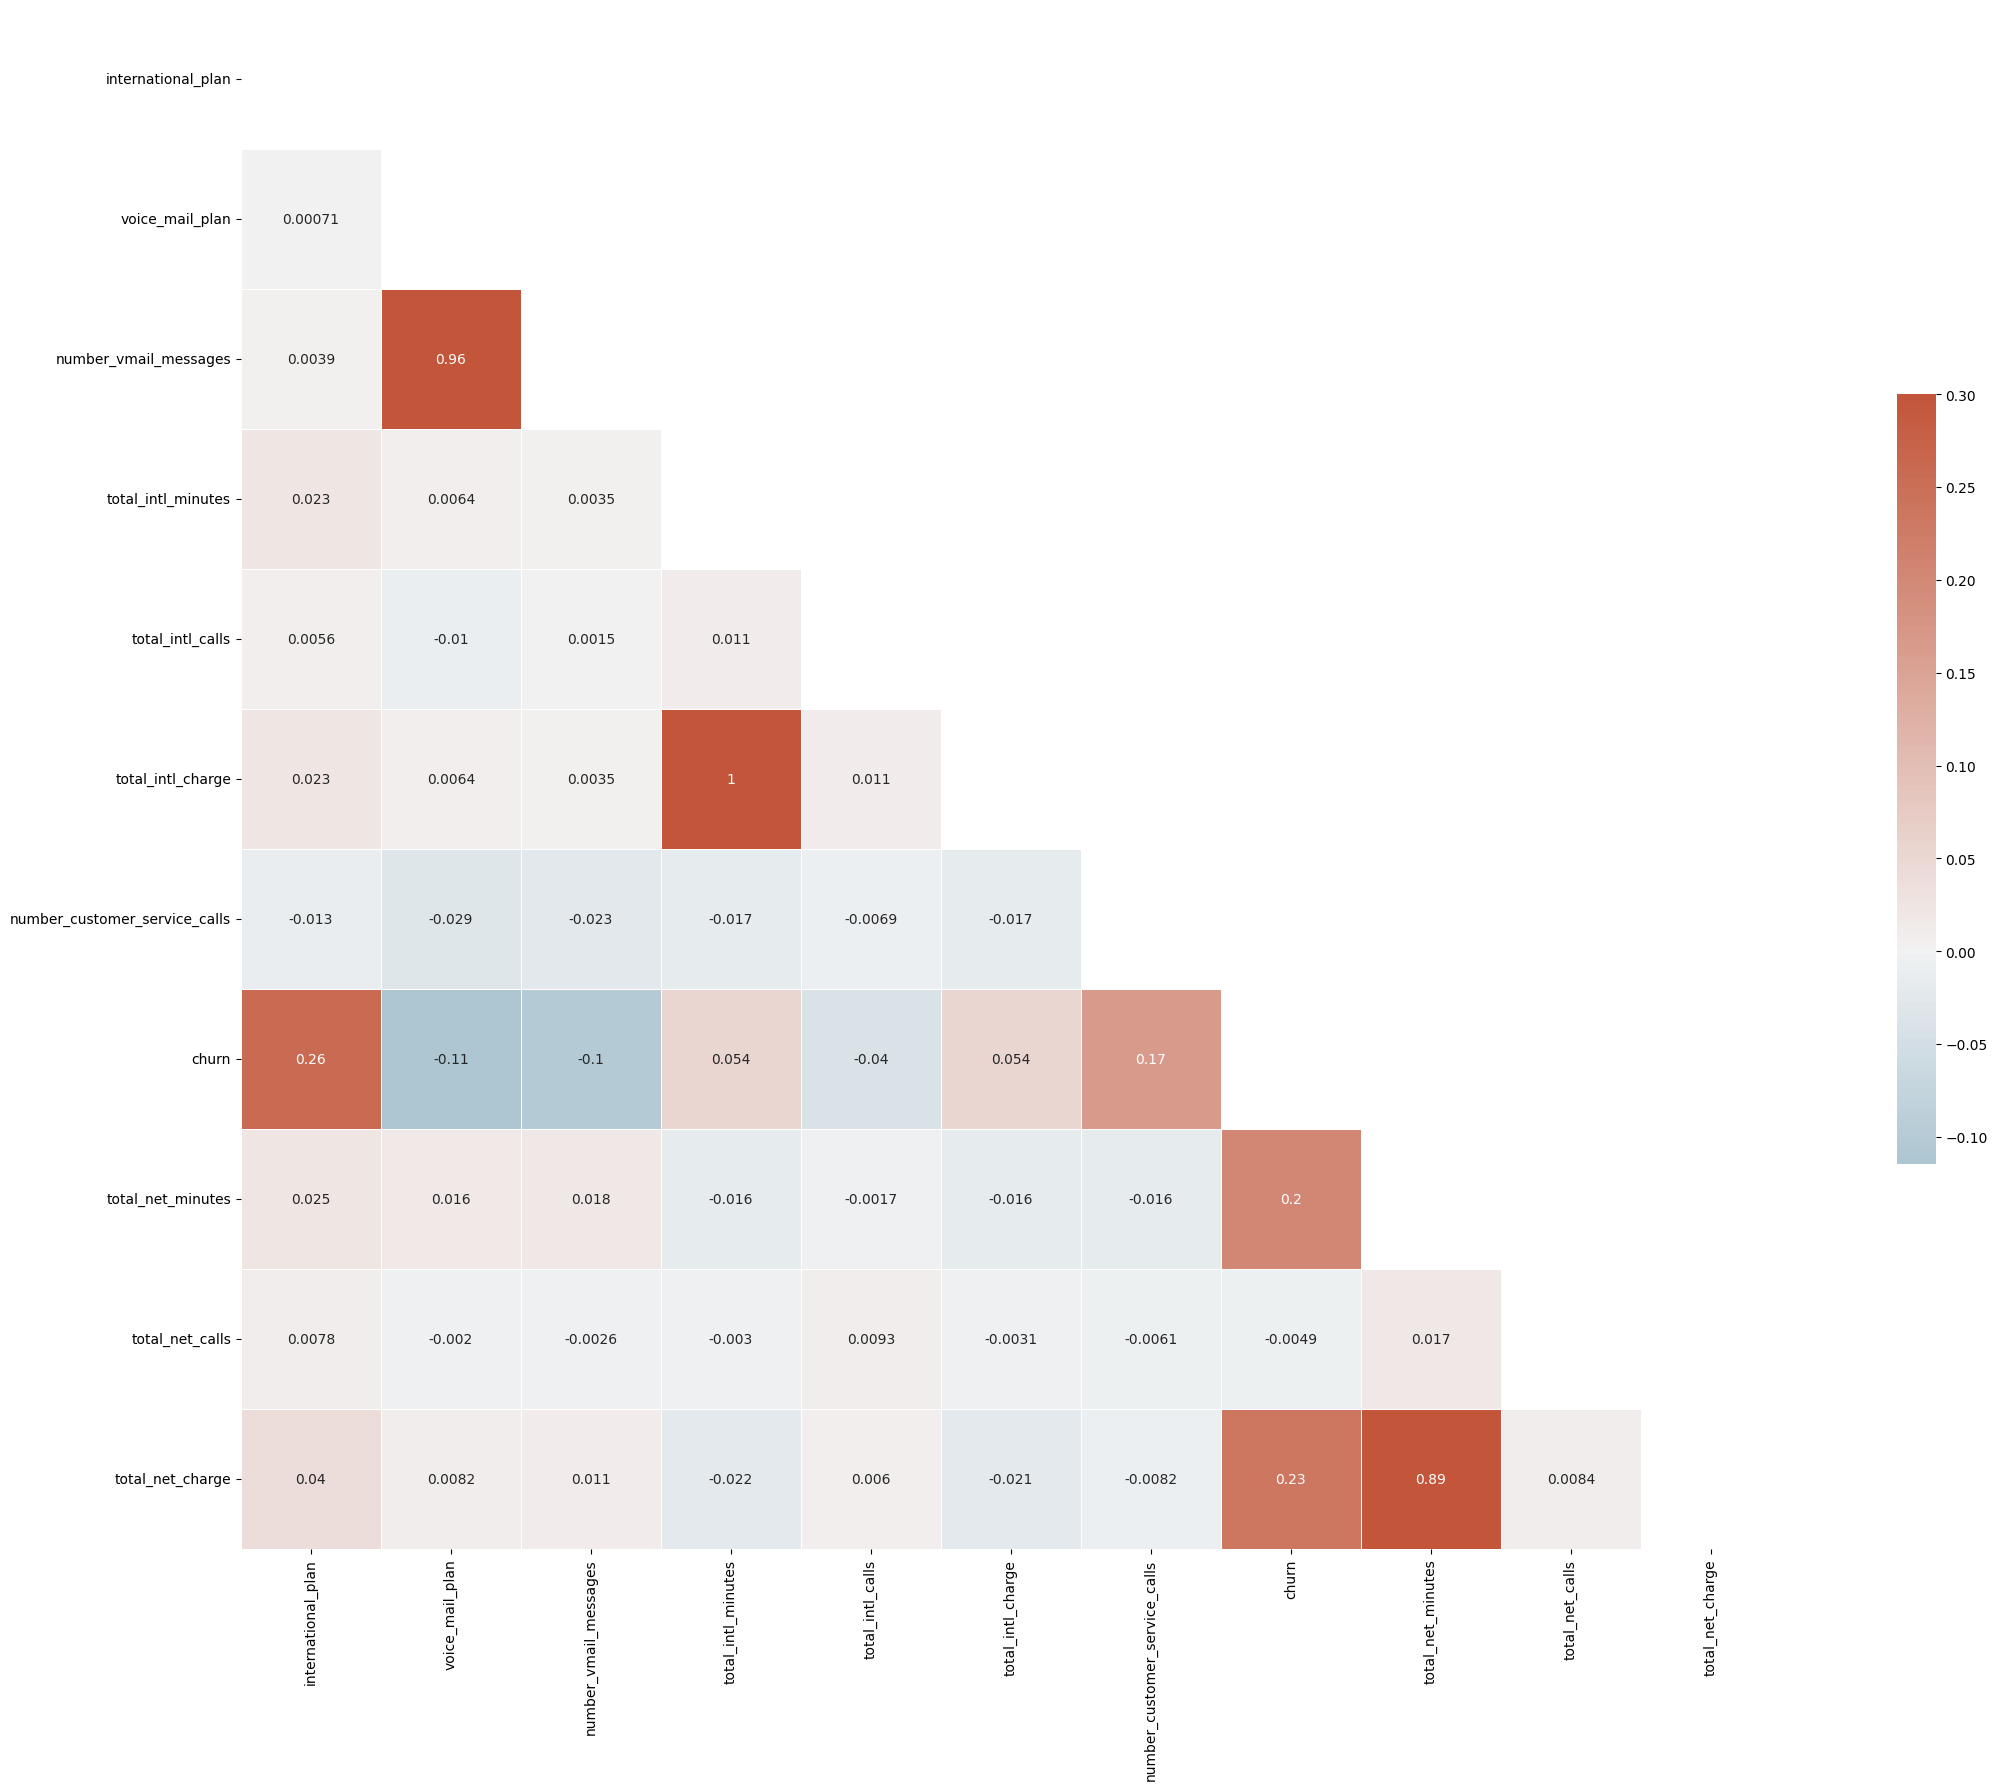

In [ ]:
corr = df.corr()
#generate mask for upper triangle 
mask = np.triu(np.ones_like(corr,dtype=bool))

#set up matplotlib figure 
f,ax = plt.subplots(figsize=(30,20))
#generate a custome divergin columns
cmap = sns.diverging_palette(230,20,as_cmap=True)
#draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True, linewidths=.5,cbar_kws={"shrink": .5}, annot= True)

In [ ]:
df.shape

(4250, 11)

In [ ]:
#two function to test correlations feature 
def get_redundant_pairs(df):
  """get diagonal and lower triangular pairs of correlation matrix
  
  Args :
  df (Dataframe) : Dataframe that we prepared before

  Return :
  set of pairs columns
  """
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0,df.shape[1]):
    for j in range(0,i+1):
      pairs_to_drop.add((cols[i],cols[j]))
  return pairs_to_drop

In [ ]:
def get_top_abs_correlation(df,n=5):
  """Sort correlation in the decending order and return n highest correlation
  
  Args :
  df (Dataframe) : Target Dataframe
  n = how many feature to show highest correlation

  Return: 
  n correlation feature with highest corelation
  """
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
  return au_corr[0:n]

In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlation(df,20))

Top Absolute Correlations
total_intl_minutes             total_intl_charge                0.999991
voice_mail_plan                number_vmail_messages            0.958941
total_net_minutes              total_net_charge                 0.890087
international_plan             churn                            0.259053
churn                          total_net_charge                 0.233677
                               total_net_minutes                0.202070
number_customer_service_calls  churn                            0.166670
voice_mail_plan                churn                            0.114643
number_vmail_messages          churn                            0.101573
total_intl_minutes             churn                            0.053631
total_intl_charge              churn                            0.053581
total_intl_calls               churn                            0.040322
international_plan             total_net_charge                 0.040117
voice_mail_plan          

##Modelling

In [ ]:
#from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , classification_report , confusion_matrix, ConfusionMatrixDisplay ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , confusion_matrix, ConfusionMatrixDisplay, precision_score , recall_score

In [ ]:
X = df.drop('churn',1)
y = df.churn

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.25 , random_state = 42)

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 


((3187, 10), (3187,), (1063, 10), (1063,))

Model that we want to try :


*   Logistic Regression
*   SVM



In [ ]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= [] 
cross_val_score_list = []

In [ ]:
def Model_features(X_train , y_train , X_test , y_test , y_pred , classifier  , model_name):
    #fig ,ax = plt.subplots(figsize = (7,6))
    accuracy , precision , recall , f1_s ,c_val_score= round(accuracy_score(y_test , y_pred) , 3) , round(precision_score(y_test, y_pred, average="micro")  ,3), round(recall_score(y_test , y_pred) ,3), round(f1_score(y_test , y_pred) , 3) , round(cross_val_score(classifier , X , y , cv=10 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'f1  Score is :{f1_s}')
    print(f'cross val score is :{c_val_score}')
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)
    cross_val_score_list.append(c_val_score)

    print(metrics.classification_report(y_test,y_pred))

In [ ]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = round(pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False) ,2 )
    
    top_weights_selected = weights[:5]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    ax = top_weights_selected.plot(kind="bar")
    ax.bar_label(ax.containers[0])
    
    return print("")

In [ ]:
def confusion_matrix_plot(X_test, y_test, classifier, classifier_name):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{classifier_name} Confusion Matrix")
    plt.show()

###Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc.score(X_test , y_test) 

0.9482596425211665

Accuracy Score is :0.948
Precision Score is :0.948
Recall Score is :0.853
f1  Score is :0.829
cross val score is :0.952
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       907
           1       0.81      0.85      0.83       156

    accuracy                           0.95      1063
   macro avg       0.89      0.91      0.90      1063
weighted avg       0.95      0.95      0.95      1063



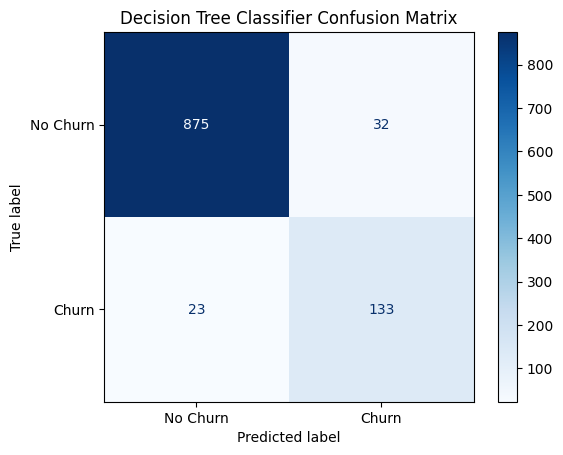

In [ ]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , dtc , "Decision Tree Classifier")   
confusion_matrix_plot(X_test , y_test , dtc , "Decision Tree Classifier")

Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test , y_test) 

0.9764816556914393

Accuracy Score is :0.976
Precision Score is :0.976
Recall Score is :0.859
f1  Score is :0.915
cross val score is :0.974
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       907
           1       0.98      0.86      0.91       156

    accuracy                           0.98      1063
   macro avg       0.98      0.93      0.95      1063
weighted avg       0.98      0.98      0.98      1063



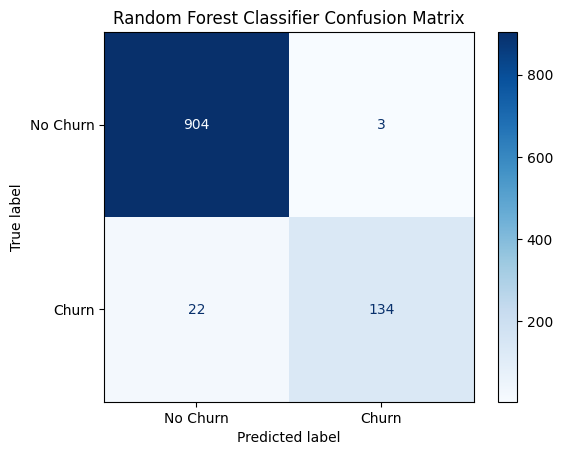

In [ ]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , rf , "Random Forest Classifier")   
confusion_matrix_plot(X_test , y_test , rf , "Random Forest Classifier")

In [ ]:
df.shape

(4250, 11)

In [ ]:
def compare_confusion_matrices(classifier1, classifier2, X_test, y_test):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    y_pred1 = classifier1.predict(X_test)
    cm1 = confusion_matrix(y_test, y_pred1, labels=[0, 1])
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["No Churn", "Churn"])
    disp1.plot(cmap=plt.cm.Blues, ax=ax1)
    ax1.set_title('Confusion Matrix - Decision Tree ')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    
    y_pred2 = classifier2.predict(X_test)
    cm2 = confusion_matrix(y_test, y_pred2, labels=[0, 1])
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["No Churn", "Churn"])
    disp2.plot(cmap=plt.cm.Blues, ax=ax2)
    ax2.set_title('Confusion Matrix - Random Forest ')
    ax2.set_xlabel('Predicted Label')
    ax2.set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

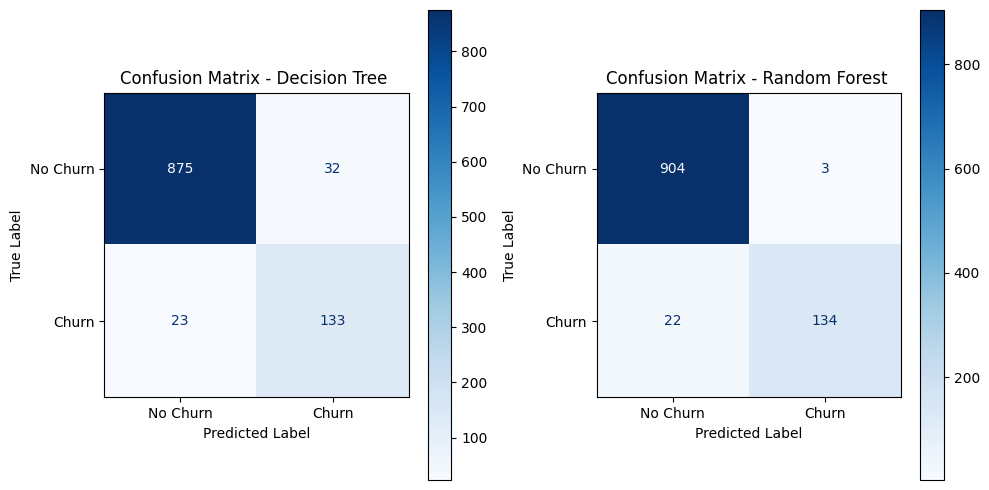

In [ ]:
compare_confusion_matrices(dtc, rf, X_test, y_test)

##Test Predict


In [ ]:
df_test = pd.read_csv("/content/Data Test.csv")


In [ ]:
df_test.drop(columns=["id","state","account_length","area_code"],inplace=True)
df_test.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df_test['total_net_minutes'] = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes']
df_test['total_net_calls'] = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls']
df_test['total_net_charge'] = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge']


df_test['voice_mail_plan'] = df_test['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df_test['international_plan'] = df_test['international_plan'].map({'yes': 1, 'no': 0}) 
#df_test['churn'] = df_test['churn'].map({'yes': 1, 'no': 0}) 

In [ ]:
df_test.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [ ]:
df.shape

(4250, 11)

In [ ]:
df_test.shape

(750, 10)

In [ ]:
df_test_Predict = df_test.copy()
#df_test_decision_tree = df_test.copy()

In [ ]:
df_test 

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,0,0,0,15.5,5,4.19,3,652.1,303,55.96
...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,11.3,7,3.05,0,548.4,307,48.66
746,0,0,0,12.3,2,3.32,3,689.5,314,63.99
747,0,0,0,14.7,2,3.97,3,654.6,276,62.75
748,0,0,0,13.6,4,3.67,1,525.8,314,48.15


In [ ]:
rf_series =  rf.predict(df_test_Predict)


In [ ]:
dtc_series = dtc.predict(df_test_Predict)

In [ ]:
df_test_Predict["churn_rf"] = rf_series
df_test_Predict["churn_dct"] = dtc_series

In [ ]:
df_test_Predict.head(20)

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,churn_rf,churn_dct
0,0,1,25,10.0,3,2.70,1,707.2,300,72.86,0,0
1,1,0,0,6.3,6,1.70,0,647.9,317,65.91,0,0
2,0,0,0,13.1,6,3.54,4,630.9,245,55.77,0,0
3,0,0,0,8.1,3,2.19,3,538.5,346,56.80,0,0
4,0,0,0,15.5,5,4.19,3,652.1,303,55.96,0,0
5,0,0,0,14.2,6,3.83,2,472.0,306,37.31,0,0
6,0,0,0,12.6,10,3.40,3,536.5,314,51.89,0,0
7,0,1,37,14.7,6,3.97,3,590.1,253,62.75,0,0
8,0,0,0,11.1,9,3.00,1,600.5,294,55.44,0,0
9,0,0,0,8.8,3,2.38,5,533.6,322,53.15,1,1


In [ ]:
#df_test_decision_tree.to_csv('Test_Prediction_by_Decision_tree_classifier.csv', index=False)
df_test_Predict.to_csv("Test_prediction.csv",index=False)


In [ ]:
df_test_Predict[df_test_Predict.churn_rf != df_test_Predict.churn_dct ]

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,churn_rf,churn_dct
53,0,1,21,5.0,5,1.35,3,717.3,316,69.81,0,1
199,1,0,0,8.3,4,2.24,4,619.0,345,60.96,0,1
212,1,0,0,9.9,6,2.67,4,557.3,318,55.96,0,1
277,0,1,23,14.1,7,3.81,1,703.0,372,63.96,0,1
314,0,0,0,10.3,4,2.78,1,649.3,326,59.90,0,1
319,0,1,27,3.8,10,1.03,1,621.4,243,54.42,0,1
372,0,0,0,9.8,9,2.65,1,715.4,286,64.15,0,1
377,0,0,0,9.9,9,2.67,3,716.4,253,60.74,0,1
425,0,1,30,5.7,3,1.54,2,520.8,234,45.78,0,1
440,0,1,20,8.9,2,2.40,1,777.9,309,68.62,0,1


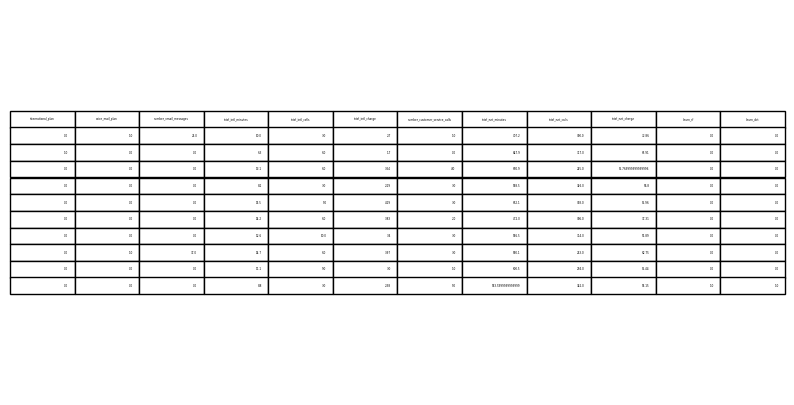

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df_test_Predict.head(10).values, colLabels=df_test_Predict.columns, loc='center')
plt.savefig('dataframe_head.png')